In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [4]:
img_size = 224
batch_size = 2
learning_rate = 1e-8

In [5]:
train_loader = get_loader(
    path=train_path,
    img_size=img_size,
    batch_size=batch_size,
    image_limit=2,
    augment=True
)

In [6]:
val_loader = get_loader(
    path=val_path,
    img_size=img_size,
    batch_size=batch_size,
    image_limit=2,
    augment=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.599141].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


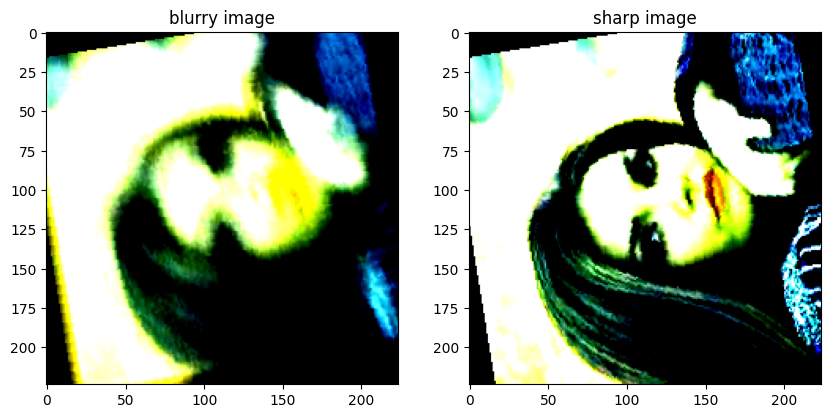

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7646158].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7646158].


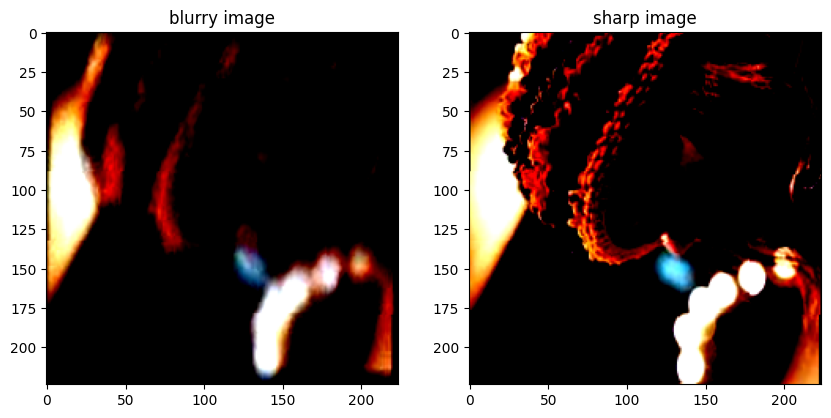

In [7]:
plot_batch(train_loader, batch_index=0)

In [8]:
from cnn import get_model

In [9]:
model = get_model(model_id='resnet50', img_size=img_size)

In [10]:
from trainer import Trainer

In [11]:
import torch.nn as nn
import torch

In [12]:
mse = nn.MSELoss()

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=mse,
    debug=True,
    debug_step=2
)

Starting Epoch 1 of 5.


  0%|          | 0/1 [00:00<?, ?batch/s]

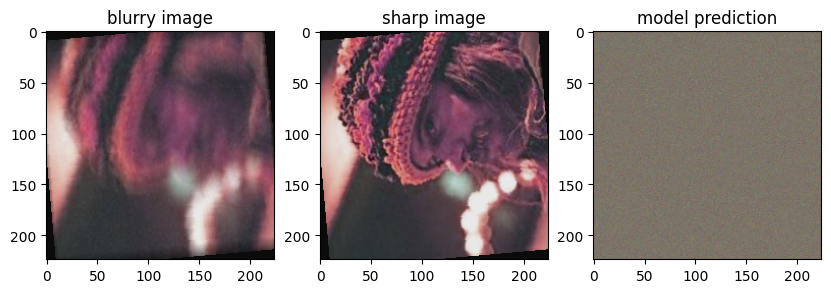

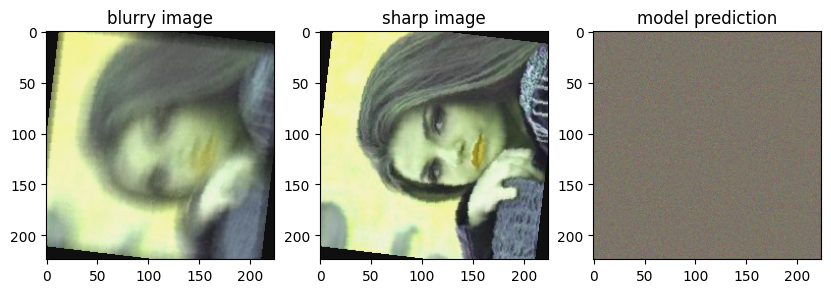

100%|██████████| 1/1 [00:00<00:00, 33.68batch/s]


Epoch: 1, Train loss: 2.6775, Validation loss: 3.2366
Starting Epoch 2 of 5.


100%|██████████| 1/1 [00:00<00:00, 36.98batch/s]


Epoch: 2, Train loss: 2.5890, Validation loss: 2.6237
Starting Epoch 3 of 5.


  0%|          | 0/1 [00:00<?, ?batch/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9522006225585937].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9552586925029755].


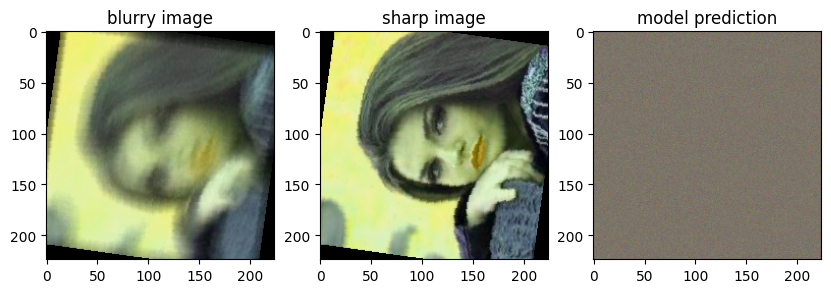

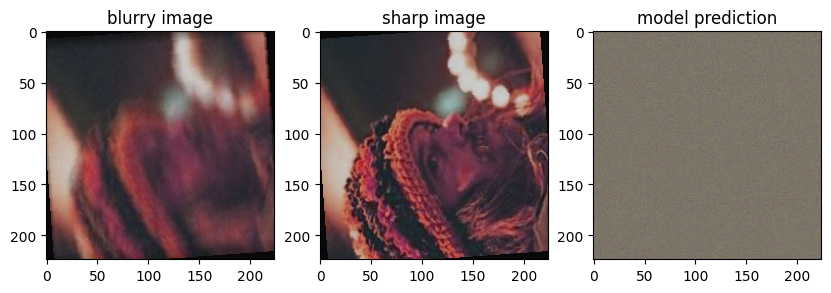

100%|██████████| 1/1 [00:00<00:00, 33.02batch/s]


Epoch: 3, Train loss: 2.7414, Validation loss: 3.4241
Starting Epoch 4 of 5.


100%|██████████| 1/1 [00:00<00:00, 32.16batch/s]


Epoch: 4, Train loss: 3.4216, Validation loss: 3.3743
Starting Epoch 5 of 5.


  0%|          | 0/1 [00:00<?, ?batch/s]

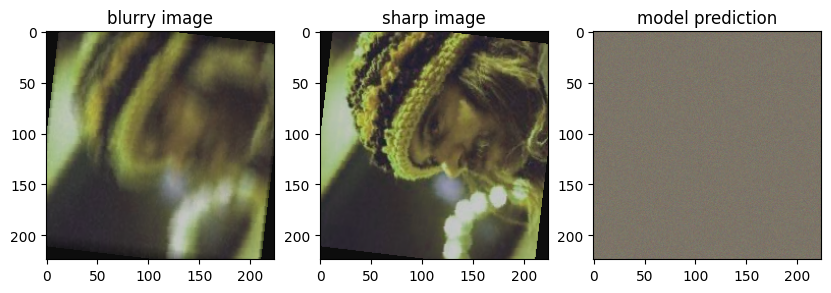

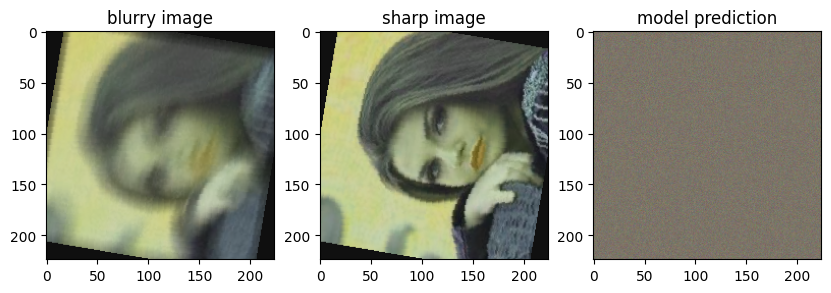

100%|██████████| 1/1 [00:00<00:00, 34.40batch/s]

Epoch: 5, Train loss: 2.0193, Validation loss: 3.1519


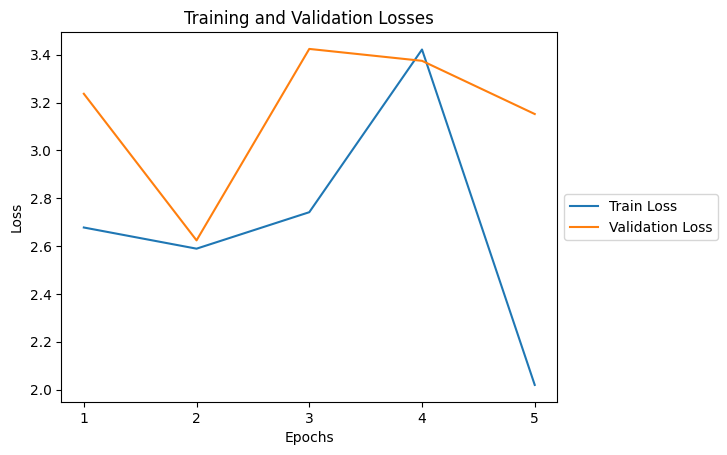

In [15]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=5
)